<a href="https://colab.research.google.com/github/Asharib90/Academy/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# change to working tensorflow directory on the drive
%cd '/content/gdrive/MyDrive/word_data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/word_data


## Importing Libraries

In [1]:
import sys,os
import pandas as pd
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
from matplotlib import cm
import librosa
import librosa.display
import re

from sklearn import preprocessing

# models
from sklearn import neighbors
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics 

# stat libraries
from scipy import stats

# Libraries for the evaluation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [88]:
import IPython.display as ipd

path = "/content/sample-000003.mp3"

samples, sample_rate=librosa.load(path ,sr=16000)
ipd.Audio(path)

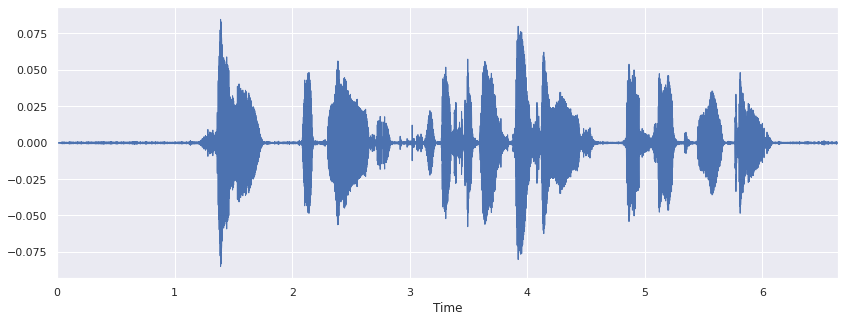

In [276]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)
ax.label_outer()


## Feature Extraction

01: MFCC

In [142]:
sample_rate = 16000
def mfcc_feature(audio):
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
 
    return mfcc   # it returns a np.array with size (40,'n') where n is the number of audio frames.

[Text(0.5, 1.0, 'MFCC')]

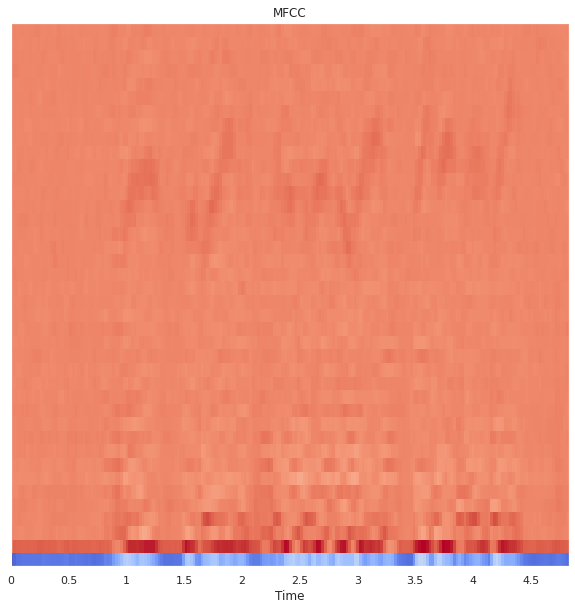

In [210]:
fig, ax = plt.subplots(figsize=(10,10))
img = librosa.display.specshow(data, x_axis='time', ax=ax)
ax.set(title='MFCC')
ax.label_outer()

02: Root-mean-square (RMS) value for each frame

In [212]:
def RMS_feature(audio):
    rms = librosa.feature.rms(y=audio)
 
    return rms   # it returns a np.array with size (1,'n') where n is the number of audio frames.

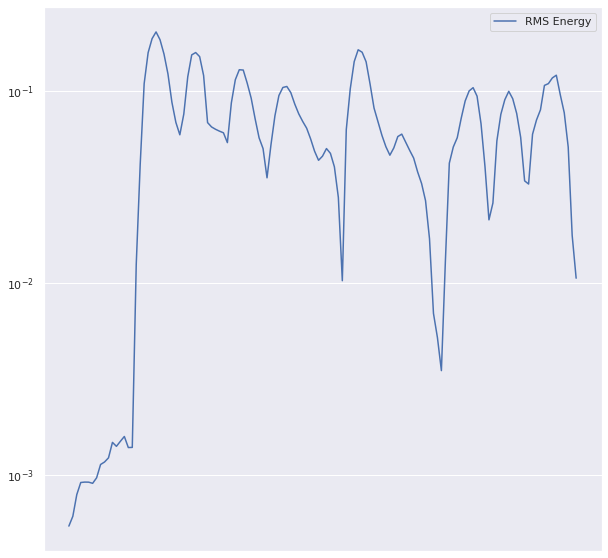

In [248]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)
ax.semilogy(times, data[0], label='RMS Energy')
ax.set(xticks=[])
ax.legend()
ax.label_outer()

03: Chroma variant “Chroma Energy Normalized” (CENS)

In [255]:
sample_rate = 16000
def CEN_feature(audio):
    cen = librosa.feature.chroma_cens(y=audio, sr=sample_rate)
 
 
    return cen   # it returns a np.array with size (12,'n') where n is the number of audio frames.

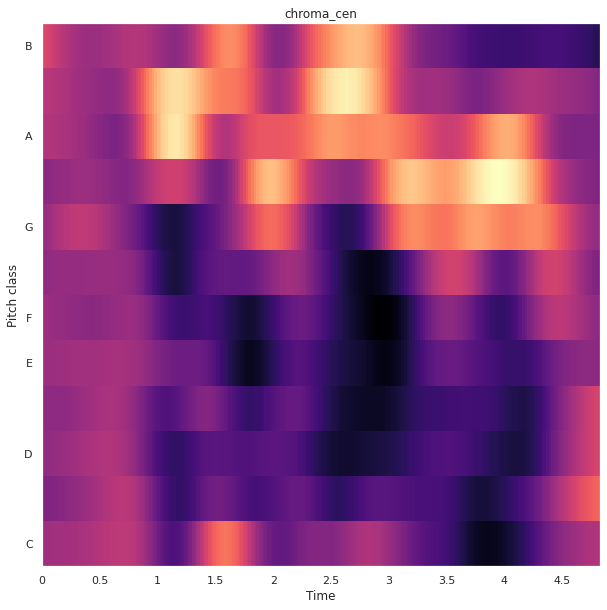

In [268]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chroma_cen')

ax.label_outer()

04:  Mel-scaled spectrogram

In [213]:
sample_rate = 16000
def melspectrogram_feature(audio):
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048)
 
    return melspectrogram   # it returns a np.array with size (128,'n') where n is the number of audio frames.

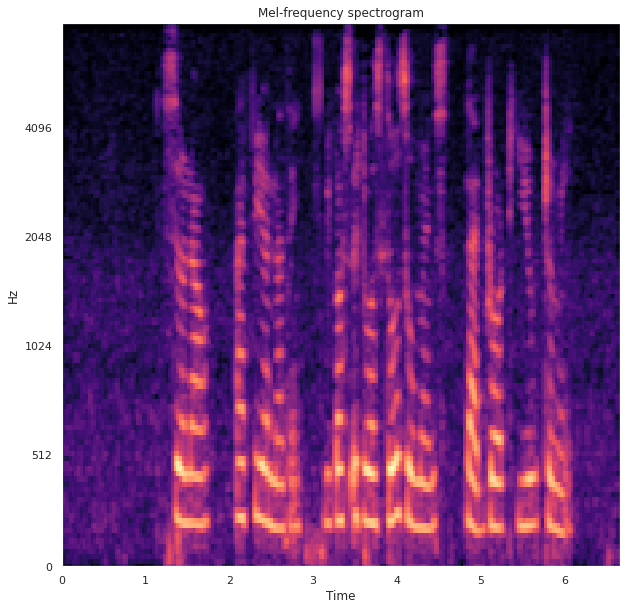

In [275]:

fig, ax = plt.subplots(figsize=(10,10))

S_dB = librosa.power_to_db(data, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=16000,

                         fmax=8000, ax=ax)


ax.set(title='Mel-frequency spectrogram')
ax.label_outer()

05:  Spectral Centroid

In [66]:
sample_rate = 16000
def spectral_centroid_feature(audio):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_centroid   # it returns a np.array with size (1,'n') where n is the number of audio frames.

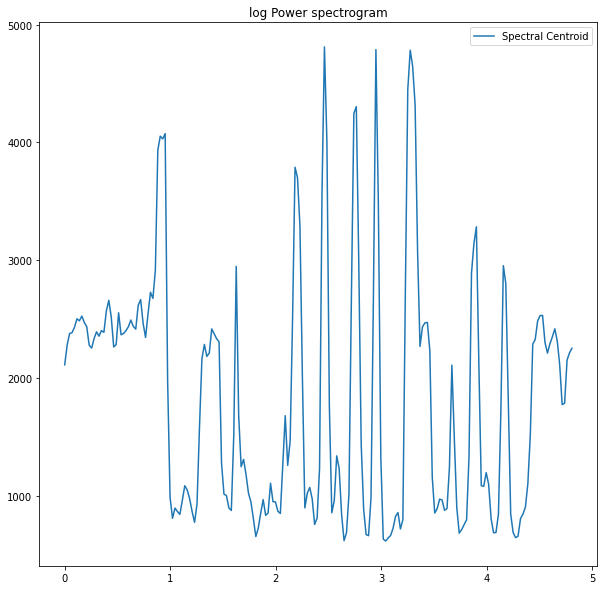

In [111]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)
ax.plot(times, data.T, label='Spectral Centroid')

ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')
ax.label_outer()

06: Zero-Crossing rate

In [65]:
def zero_crossing_rate_feature(audio):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio, frame_length=2048)
 
    return zero_crossing_rate   # it returns a np.array with size (1,'n') where n is the number of audio frames.

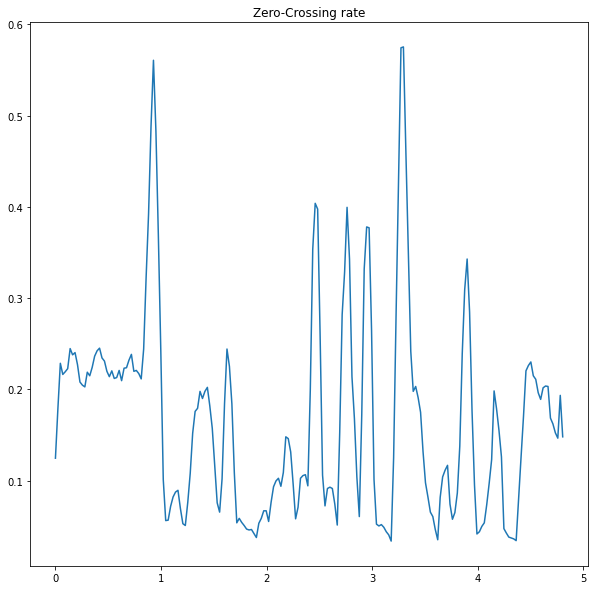

In [113]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)
ax.plot(times, data[0])

ax.set(title='Zero-Crossing rate')
ax.label_outer()

07: Spectral Contrast

In [64]:
sample_rate = 16000
def spectral_contrast_feature(audio):
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_contrast   # it returns a  np.array with size (1,'n') where n is the number of audio frames.

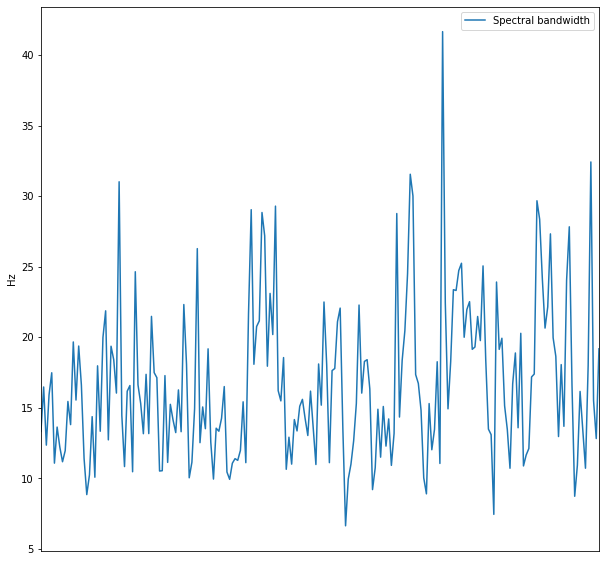

In [115]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[0], label='Spectral bandwidth')

ax.set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])

ax.legend()

ax.label_outer()

08: Poly Feature

In [89]:
sample_rate = 16000
def poly_feature(audio):
    poly_features = librosa.feature.poly_features(y=audio, sr=sample_rate, n_fft=2048)
 
    return poly_features   # it returns a np.array with size (2,'n') where n is the number of audio frames.

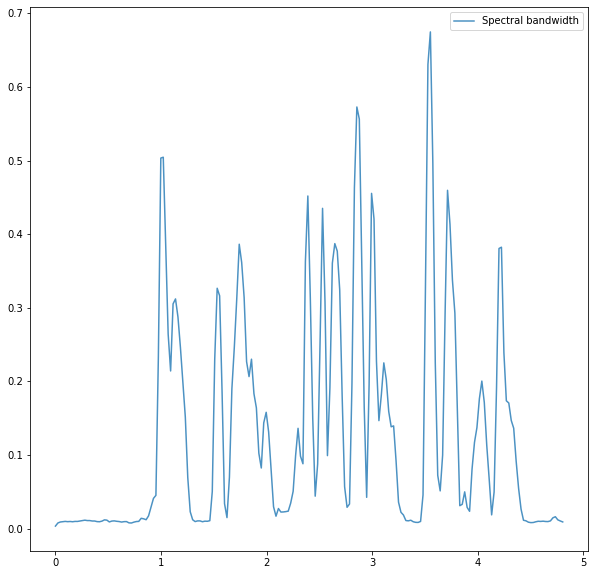

In [119]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[1].T, alpha=0.8, label='Poly Feature')

ax.legend()
ax.label_outer()

09: roll-off frequency

In [8]:
sample_rate = 16000
def spectral_rolloff_feature(audio):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_rolloff   # it returns a np.array with size (1,'n') where n is the number of audio frames.

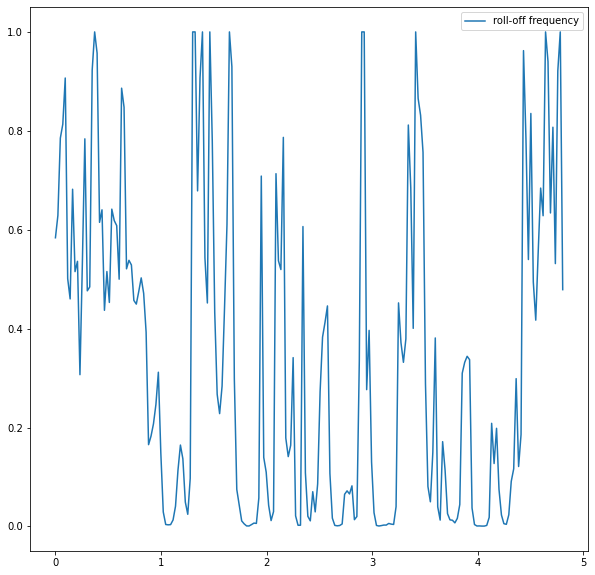

In [138]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[0],  label='roll-off frequency')

ax.legend()
ax.label_outer()

10: Chroma_stft

In [131]:
sample_rate = 16000
def chroma_stft_feature(audio):
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=2048)
 
    return chroma_stft   # it returns a np.array with size (12,'n') where n is the number of audio frames.

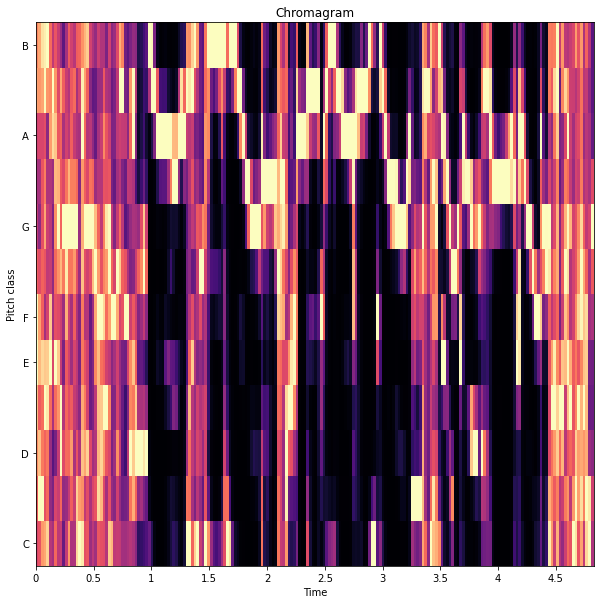

In [136]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
ax.label_outer()

In [130]:
data = chroma_stft_feature(samples)

In [78]:
len(data[0])

129

In [47]:
data.shape


(1, 129)